# Data Types, and Data Handling

Machine learning primarily involves operations on numerical collections, particularly vectors and matrices. In dimensions beyond two, these data structures are termed tensors. As a result, prominent deep learning frameworks are centered on tensor manipulation and transformation.

Before discussing the tensor processing capabilities of the two DL libraries, we must mention “numpy”, the numerical Python library, offered multi-dimensional matrix (tensor) operations for Python long before the inception of deep learning frameworks, and is a cornerstone library when it comes to any mathematical operations.

In [ ]:
import tensorflow as tf
import numpy as np
import torch
import torch.nn as nn


PyTorch and TensorFlow share extensive tensor operations similar to numpy, though with some naming variations. This facilitates smooth transition between frameworks.


### Difference 1
Numpy uses ndarray, while PyTorch and TensorFlow utilize Tensor objects. The key distinction lies in interoperability: numpy and TensorFlow can operate on each other's tensors, enabling simultaneous use in a project. In contrast, PyTorch's operations are exclusive to torch.Tensor objects.

In [ ]:
# declares two tensors for numpy and PyTorch respectively,
# and attempts to print the square of the tensors using torch.square()

np_tensor = np.array([1, 2, 3])
torch_tensor = torch.tensor([1, 2, 3])

# will work fine
print(torch.square(torch_tensor))

 # will give clear error indicating need for torch.Tensor object
print(torch.square(np_tensor))

tensor([1, 4, 9])


TypeError: ignored

Thankfully, it’s very easy to convert a numpy array to a torch tensor and vice versa, making it possible to use both together with slight workarounds!

In [ ]:
# will work fine after conversion to torch.tensor
print(torch.square(torch.tensor(np_tensor)))

tensor([1, 4, 9])


Unlike PyTorch, TensorFlow allows operations on numpy arrays and vice versa, enhancing user-friendliness for beginners.

In [ ]:
# TensorFlow
tf_tensor = tf.constant([1, 2, 3])
# Numpy
np_tensor = np.array([1, 2, 3])

# Using tf.square on a tensorflow tensor
print(tf.square(tf_tensor))

# Using tf.square on a numpy array and vice versa (will work fine)
print(tf.square(np_tensor))
print(np.square(tf_tensor))

tf.Tensor([1 4 9], shape=(3,), dtype=int32)
tf.Tensor([1 4 9], shape=(3,), dtype=int64)
[1 4 9]


### Difference 2

An additional yet important distinction to make is that PyTorch follows
a “channels-first” convention when it comes to multi-dimensional tensors—like
 (color) images.

There are many different ways to represent color images, a common method is to
treat them as a set of 3 (width x height) matrices, one for each color channel.

Numpy and PyTorch use shape notation (3, width, height). However, frameworks like TensorFlow use notation (width, height, 3) which represents a matrix of 3-valued vectors. This distinction is crucial, as it can lead to mismatch errors when using PyTorch with other libraries.

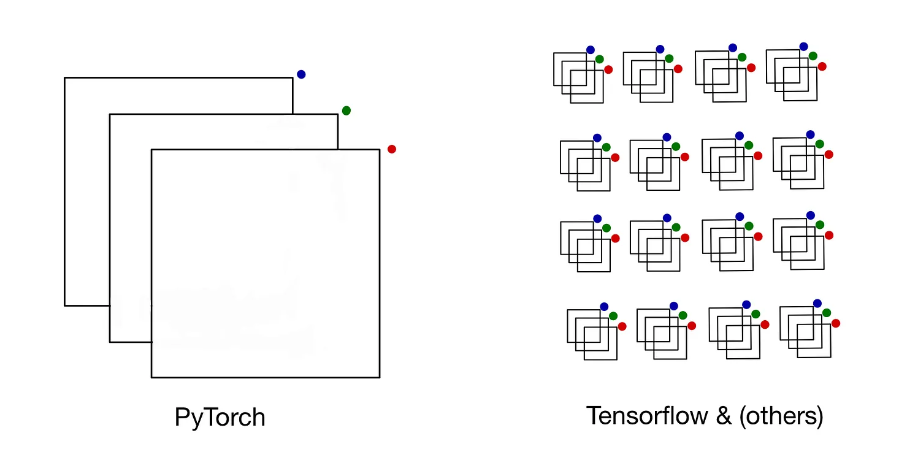

# Device Management

### Difference 1

Device utilization is one area in which these frameworks differ; using TensorFlow, if a GPU is available, the framework will automatically utilize it when performing tensor operations, this applied to manual operations such as the squaring operation shown above, and to the inner workings of DL models as well.

With PyTorch on the other hand, the user must manually “move” variables and models to the GPU if they require the operations to be performed by it rather than the CPU. This can be done quite simply in a variety of ways as shown below:

In [ ]:
# #Suppose this model building function is defined
# model = get_model() #This model will not be on the GPU

# model = get_model().to('cuda') #This model's weights will be on the GPU
# #or
# #model = get_model().cuda() #This model's weights will also be on the GPU

It is vital to know, that all variables involved in a computation must be on the same device, or else PyTorch will throw an error:

In [ ]:
a = torch.tensor([1, 3, 5, 7]).to('cuda')
b = torch.tensor([0, 2, 4, 8])

# will give an error
c = a + b
print(c)

RuntimeError: ignored

Another thing to point out is the fact that PyTorch errors are mostly quite concise and this makes debugging a relatively pleasant task!

In [ ]:
# Changing the code to the following makes it work, note the fact that
# the tensor states that it’s a GPU tensor
a = torch.tensor([1, 3, 5, 7]).to('cuda')
b = torch.tensor([0, 2, 4, 8]).to('cuda')

c = a + b
print(c)


tensor([ 1,  5,  9, 15], device='cuda:0')


As mentioned before a PyTorch tensor can be converted to a numpy array by calling .numpy() on it, however, if we were to do that on the variable c (processed on a GPU) we would run into the following error:

In [ ]:
c = c.numpy()
# will run into error "can't convert cuda:0 device type tensor to numpy. Use
# Tensor.cpu() to copy the tensor to host memory first."

TypeError: ignored

This error message aptly tells us that while the tensor is on GPU this is not possible, along with what we must do to make it work, that is, move the tensor back to CPU.

In [ ]:
c = c.cpu()
#or
#c = c.to('cpu')

c = c.numpy()

Weights in a model need gradient computation and are part of a computation graph. They can't be directly converted to numpy arrays. Attempting to do so after moving them to the CPU will result in an error.

In [ ]:
x = torch.tensor([2.0, 4.0, 6.0], requires_grad=True).to('cuda')
x = torch.square(x)


In [ ]:
print(x)
# tensor([ 4., 16., 36.], device='cuda:0', grad_fn=<PowBackward0>)

tensor([ 4., 16., 36.], device='cuda:0', grad_fn=<PowBackward0>)


In [ ]:
x = x.to('cpu').numpy()
# will run into error "Can't call numpy() on Tensor that requires grad. Use
# tensor.detach().numpy() instead."

RuntimeError: ignored

The remedy to this error is to “detach” the tensor from the computation graph and this can be done as follows:

In [ ]:
x = x.detach().to('cpu').numpy()
# will work fine

While this may seem like a lot of work for something that automatically happens on the other framework (TensorFlow) it's not without its advantages. The ability to control which device operations may occur with a few function calls provides extra flexibility and makes debugging a lot easier.